In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [34]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data - 60,000 Images
Testing Data - 10,000 Images
Image dimension - 28 x 28

In [35]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [36]:
print(x_train[10].shape)

(28, 28)


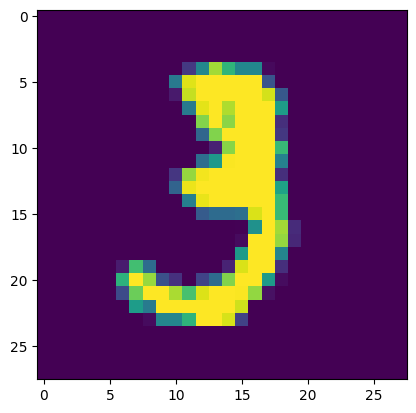

3


In [37]:
plt.imshow(x_train[10])
plt.show()
print(y_train[10])

In [38]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [39]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [40]:
x_train = x_train/255
x_test = x_test/255

In [41]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.9152
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1407 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1054 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0852 - accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0698 - accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0597 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9826
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0465 - accuracy: 0.9848
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0403 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.035

Training Data Accuracy - 98.7%

In [44]:
loss, accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0981 - accuracy: 0.9730
0.9729999899864197


Test Data Accuracy - 97.3%

In [45]:
print(x_test.shape)

(10000, 28, 28)


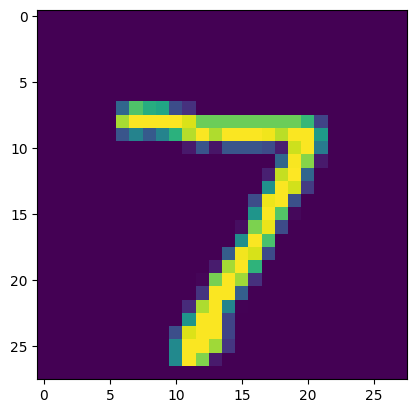

In [46]:
plt.imshow(x_test[0])

In [47]:
print(y_test[0])

7


In [48]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [49]:
print(y_pred.shape)

(10000, 10)


In [50]:
print(y_pred[0])

[7.7495327e-10 7.3881883e-09 2.1327206e-07 1.1731045e-05 1.8993609e-11
 8.7377856e-09 7.8903462e-17 9.9998629e-01 1.4878565e-06 3.5282139e-07]


In [51]:
label = np.argmax(y_pred[0])
print(label)

7


In [52]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test = true labels
y_pred_labels = predicted labels

In [53]:
conf_mat = confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

[[ 963    0    2    1    1    1    6    3    2    1]
 [   0 1120    3    2    0    0    4    1    5    0]
 [   2    1 1004    3    4    1    2    8    7    0]
 [   1    0    1  979    0    7    1   10    7    4]
 [   1    0    3    1  957    0    6    0    1   13]
 [   2    0    0   10    2  872    1    0    3    2]
 [   3    2    2    1    4   11  932    0    2    1]
 [   0    1    7    3    1    0    0 1008    3    5]
 [   6    1    4    4    5   11    2    6  932    3]
 [   2    2    0    5   20    6    0    9    2  963]]


Text(0.5, 47.7222222222222, 'Predicted Labels')

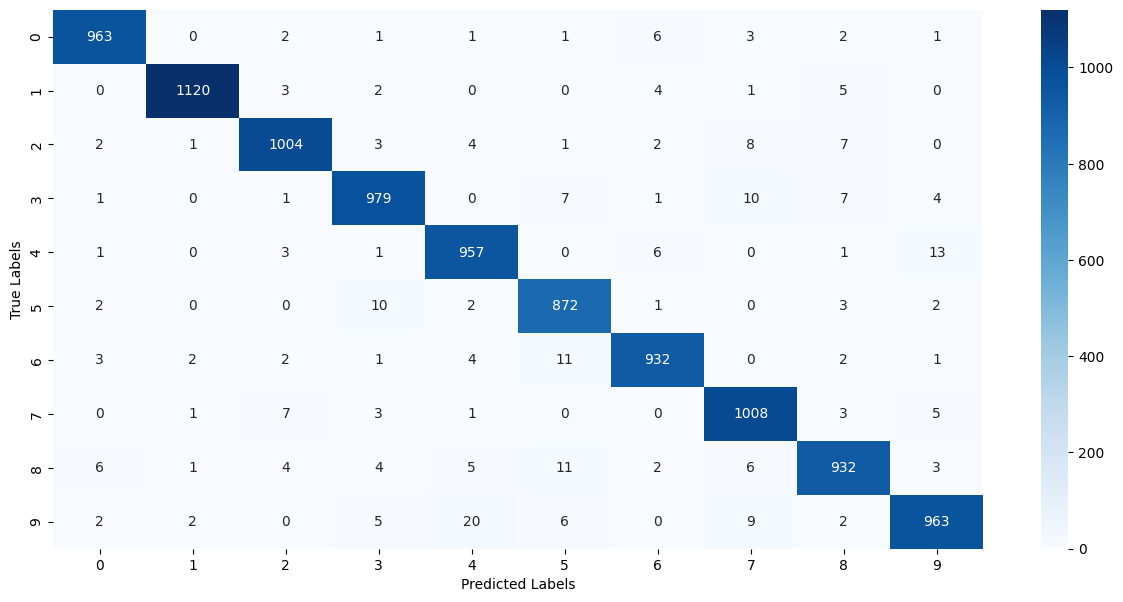

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [55]:
input_img_name = 'mnist.png'
input_img = cv2.imread(input_img_name)
type(input_img)

numpy.ndarray

In [56]:
#cv2.imshow('Image',input_img)
input_img.shape

(318, 318, 3)

In [57]:
greyscale = cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)
greyscale.shape

(318, 318)

In [58]:
input_img_resize = cv2.resize(greyscale,(28,28))
input_img_resize.shape

(28, 28)

In [59]:
input_img_resize = input_img_resize/255
print(type(input_img_resize))
image_reshaped = np.reshape(input_img_resize,[1,28,28])

<class 'numpy.ndarray'>


In [60]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 21ms/step
[[4.0338240e-14 8.2486550e-15 5.5087390e-10 1.0000000e+00 3.2790123e-22
  1.1332614e-14 1.3502165e-25 9.4840336e-10 9.8255175e-11 1.3269186e-12]]


In [61]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


Predictive System

In [62]:
input_img_path = input('Enter the path of the image to be predicted: ')
input_img = cv2.imread(input_img_path)
#cv2.imshow('img',input_img)
greyscale = cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)
input_img_resize = cv2.resize(greyscale,(28,28))
input_img_resize = input_img_resize/255
image_reshaped = np.reshape(input_img_resize,[1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print("The Handwritten Digit is recognised as ", input_pred_label)

1/1 [==============================] - 0s 35ms/step
The Handwritten Digit is recognised as  3
